In [1]:
from os import listdir, remove
from PIL import Image
import matplotlib .pyplot as plt
import numpy as np
import seaborn as sns

The PCam dataset contains three different sets of data: test, validation, and training data for both classification labels (tumor, no_tumor). The training data for the *no_tumor* label contains corrupted images that essentially are blank image data. The code below shows a snapshot of 16 images. The goal of the present notebook is to develop code to automatically idenitfy the corrupted images and remove them from the training *no_tumor* data directory. It is hoped that removal of corrupted data improves training for CNN models.

In [2]:
filepath = 'cancer data\\train\\a_no_tumor_tissue'

idx = [135, 2542, 2545, 2547,
       2565, 2572, 2584, 2596,
       2610, 2614, 2615, 2616,
       2624, 2625, 2626, 2627]

In [3]:
def draw_images(idx):
    nrows =  ncols = int(len(idx)/4)
    
    f, ax = plt.subplots(nrows , ncols , figsize = (18, 18))    
    k = 0
    for i in range(0, nrows):
        for j in range(0, ncols):
            img = Image.open(filepath+'\\'+str(idx[k])+'.jpg')
            ax[i, j].imshow(img)
            ax[i, j].set_title(idx[k], fontsize = 12)
            sns.set_style()
            k += 1
            
    plt.show()


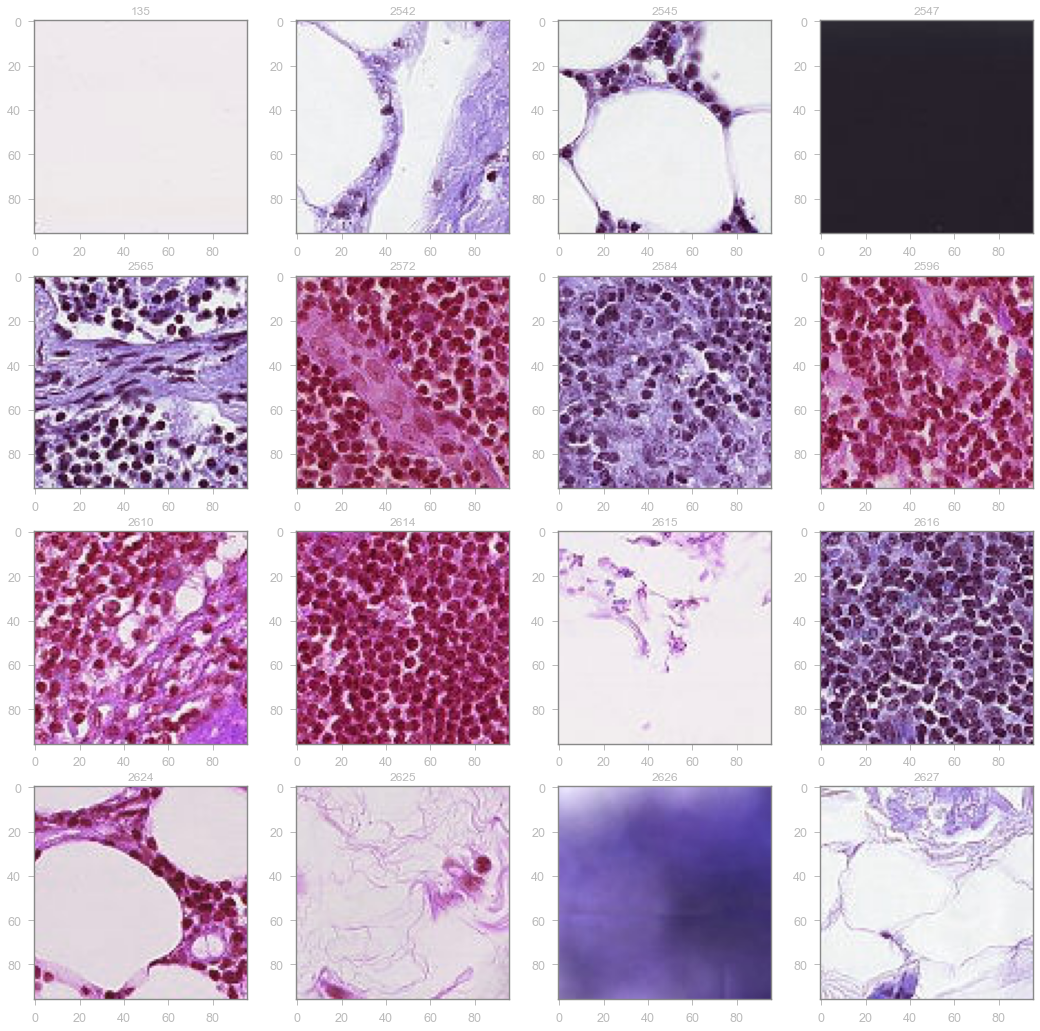

In [4]:
draw_images(idx)

***
We will detect corrupted images by: </br>

(i) splitting the individual image data into the RGB components</br>

(ii) calculate the associated variance for each component, and </br>

(iii) removing images whose summed RGB variance is below a specified threshold value</br>

For example, let's do this for four of the slides presented above. A pure 'white' dataset (135), a 'black' dataset (2547), a scan presenting some information (2615), and a scan presenting a lot of ceelular information (2610). From here, we can assess the summed variance for each type of slide, which will allow for a choice of thresholding for file removal.

In [5]:
idx2 = [135, 2547, 2615, 2610]

In [6]:
def histoplot_stdcalc(image_data):
    img = Image.open(filepath+'\\'+str(image_data)+'.jpg')
    r, g, b = img.split()
    
    ## Calculate mean and variance
    r_mean, r_std = np.mean(r), np.std(r)
    g_mean, g_std = np.mean(g), np.std(g)
    b_mean, b_std = np.mean(b), np.std(b)
    
    ax = sns.barplot(x = list(range(0,256)), y = r.histogram(), color = 'r', label = '{:.1f}'.format(r_mean) + ' +/- ' + '{:.1f}'.format(r_std))
    ax = sns.barplot(x = list(range(0,256)), y = g.histogram(), color = 'g', label = '{:.1f}'.format(g_mean) + ' +/- ' + '{:.1f}'.format(g_std))
    ax = sns.barplot(x = list(range(0,256)), y = b.histogram(), color = 'b', label = '{:.1f}'.format(b_mean) + ' +/- ' + '{:.1f}'.format(b_std))
    plt.legend()
    plt.xlabel('RGB value')
    plt.ylabel('Count')
    
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 20 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)    

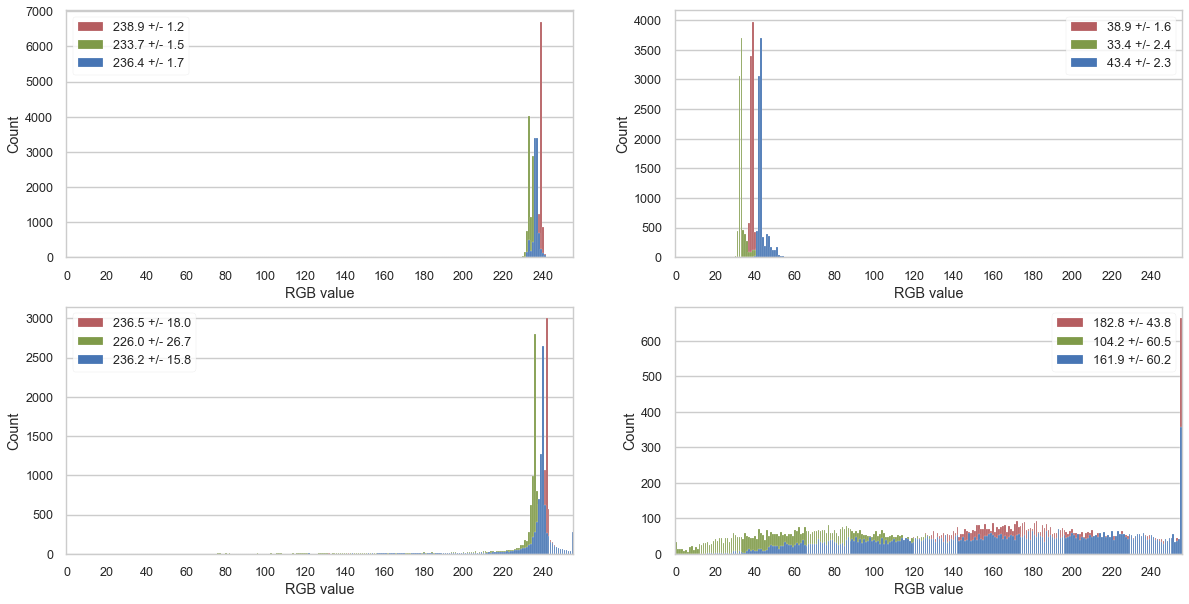

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,10))
for ii, jj in enumerate(idx2):
    plt.subplot(2,2,ii+1)
    histoplot_stdcalc(jj)

So it appears that the summed standard deviation doesn't exceed 10 RGB units for blank images, irrespective of whether they are *light* or *dark* images. Using a modified directory, we will set the threshold to 20, and remove images that do not reach this criteria.

In [ ]:
filepath = 'cancer data\\train\\a_no_tumor_tissue_modified'

In [8]:
threshold = 20
img_retain = []
img_remove = []

for filename in listdir(filepath):
    if filename.endswith('.jpg'):

        img = Image.open(filepath+'\\'+filename)
        r, g, b = img.split()
        if sum([np.std(r), np.std(g), np.std(b)])>threshold:
            img_retain.append(filename)
        else:
            img_remove.append(filename)
            #remove((filepath+'\\'+filename))
            
print('{} of {} images are corrupted based on threshold criteria'.format(len(img_remove), len(img_remove)+len(img_retain)))

1135 of 131072 images are corrupted based on threshold criteria


Visualize the first 16 retained and first 16 removed image files

***
Retained
***

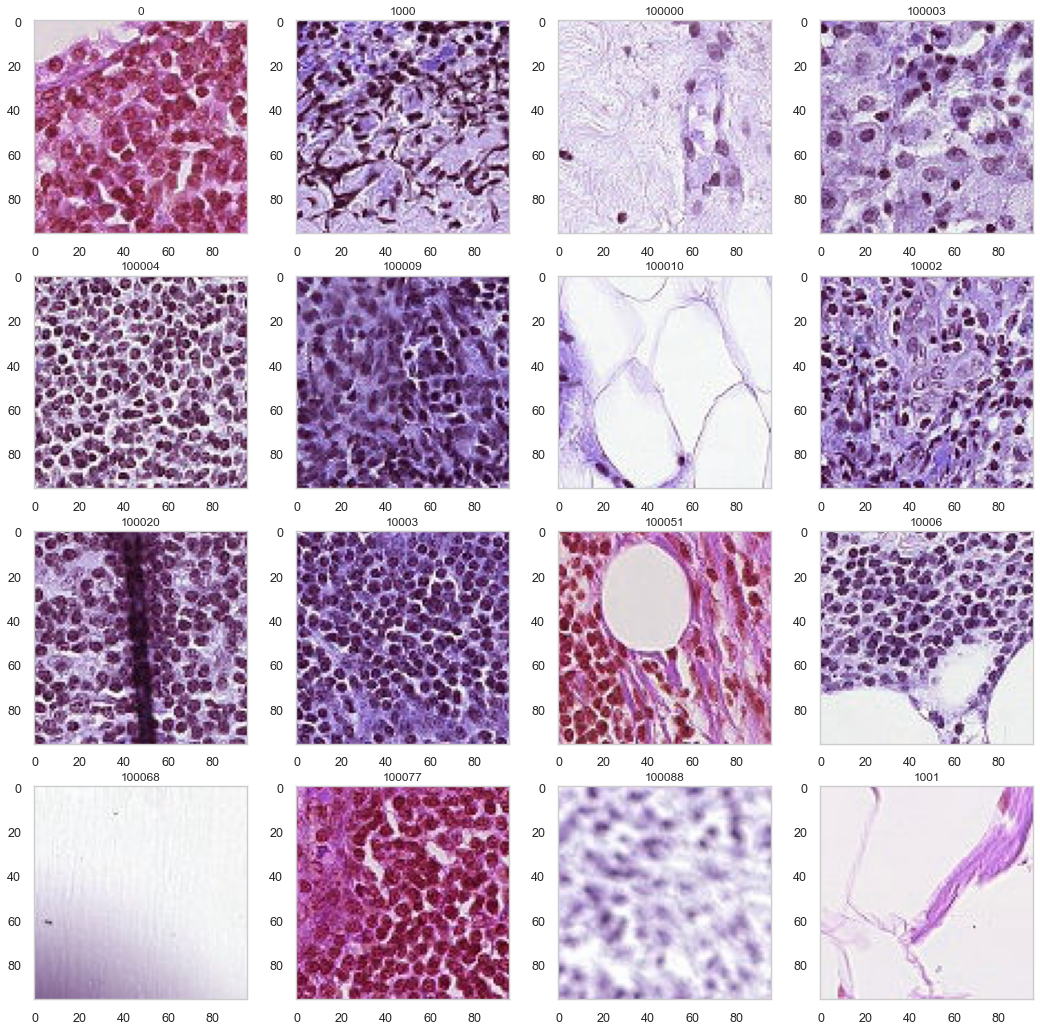

In [17]:
filepath = 'cancer data\\train\\a_no_tumor_tissue'
idx = [int(ii[:-4]) for ii in img_retain[0:16]]

draw_images(idx)
sns.set_style({'axes.grid' : False})

***
Removed
***

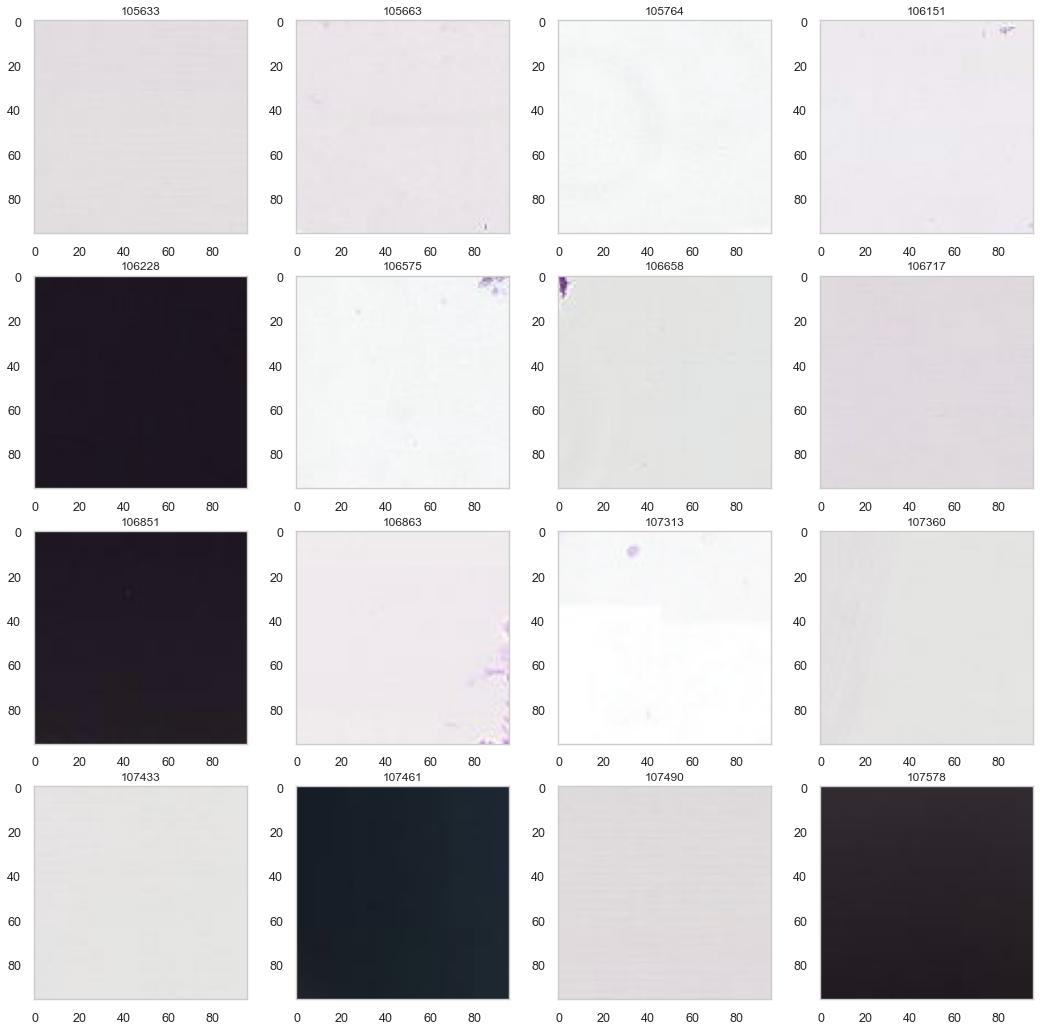

In [18]:
idx = [int(ii[:-4]) for ii in img_remove[16:33]]
draw_images(idx)
sns.set_style({'axes.grid' : False})